<a href="https://colab.research.google.com/github/KU-ZHANGZIYUE/RainfallForecasting_ConvEncDec/blob/rainnet_test/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Convolutional Encoder Decoder Model
#Author: ZHANG Ziyue (Kyoto University)
#Date: 2011/11/3

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Research/Prepared_Data

Mounted at /content/drive/
/content/drive/MyDrive/Research/Prepared_Data


In [3]:
import numpy as np
import os
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


In [4]:
def unet():
    
    inputs = Input((180, 120, 3))
    resized_inputs = ZeroPadding2D(padding=(2,0))(inputs)

    conv1f = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(resized_inputs)
    conv1f = Activation("relu")(conv1f)
    conv1s = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(conv1f)
    conv1s = Activation("relu")(conv1s)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1s)

    conv2f = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(pool1)
    conv2f = Activation("relu")(conv2f)
    conv2s = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(conv2f)
    conv2s = Activation("relu")(conv2s)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2s)
    
    conv3f = Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(pool2)
    conv3f = Activation("relu")(conv3f)
    conv3s = Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(conv3f)
    conv3s = Activation("relu")(conv3s)
    drop3 = Dropout(0.5)(conv3s)
    pool3 = MaxPooling2D(pool_size=(2, 2))(drop3)
    
    conv4f = Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(pool3)
    conv4f = Activation("relu")(conv4f)
    conv4s = Conv2D(512, 3, padding='same', kernel_initializer='he_normal')(conv4f)
    conv4s = Activation("relu")(conv4s)
    drop4 = Dropout(0.5)(conv4s)

    up7 = concatenate([UpSampling2D(size=(2, 2))(drop4), conv3s], axis=3)
    conv7 = Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(up7)
    conv7 = Activation("relu")(conv7)
    conv7 = Conv2D(256, 3, padding='same', kernel_initializer='he_normal')(conv7)
    conv7 = Activation("relu")(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2s], axis=3)
    conv8 = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(up8)
    conv8 = Activation("relu")(conv8)
    conv8 = Conv2D(128, 3, padding='same', kernel_initializer='he_normal')(conv8)
    conv8 = Activation("relu")(conv8)

    #conv8 = ZeroPadding2D(padding=(1,0))(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1s], axis=3)
    conv9 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(up9)
    conv9 = Activation("relu")(conv9)
    conv9 = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Activation("relu")(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    resize = Resizing(180, 120, interpolation="bilinear")(conv9)  #Extra
    
    outputs = Conv2D(1, 1, activation='linear')(resize)

    model = Model(inputs=inputs, outputs=outputs)

    return model

print(unet().summary())
#然后validation改成20%，这个意思就是这最后20不会被用来traintrain
#然后挑选"validation"也就是最后20%的data中的几个sample，plot出来input，prediction和ground truth

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 184, 120, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 184, 120, 64  1792        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
input = np.load('./input.npy')
output = np.load('./output.npy')
input = input/10   ###
output = output/10  ###

model = unet()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='log_cosh', metrics=['accuracy'])
result = model.fit(input, output, batch_size=8, epochs=10, validation_split=0.2) #val may be 20%
model.save('result_01.h5')

Epoch 1/10
82/82 [==============================] - 35s 416ms/step - loss: 0.0713 - accuracy: 0.5376 - val_loss: 0.0089 - val_accuracy: 0.4056
Epoch 2/10
82/82 [==============================] - 30s 367ms/step - loss: 0.0637 - accuracy: 0.5381 - val_loss: 0.0091 - val_accuracy: 0.4056
Epoch 3/10
82/82 [==============================] - 30s 367ms/step - loss: 0.0631 - accuracy: 0.5381 - val_loss: 0.0096 - val_accuracy: 0.4056
Epoch 4/10
82/82 [==============================] - 30s 366ms/step - loss: 0.0630 - accuracy: 0.5381 - val_loss: 0.0098 - val_accuracy: 0.4056
Epoch 5/10
82/82 [==============================] - 30s 366ms/step - loss: 0.0630 - accuracy: 0.5381 - val_loss: 0.0099 - val_accuracy: 0.4056
Epoch 6/10
82/82 [==============================] - 30s 366ms/step - loss: 0.0630 - accuracy: 0.5381 - val_loss: 0.0100 - val_accuracy: 0.4056
Epoch 7/10
82/82 [==============================] - 30s 366ms/step - loss: 0.0630 - accuracy: 0.5381 - val_loss: 0.0099 - val_accuracy: 0.4056

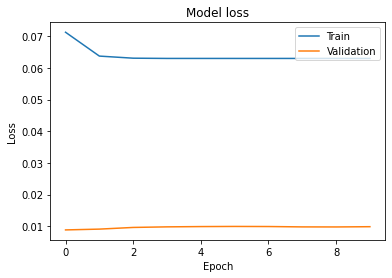

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.ylim(-0.1, 0.2)
plt.show()

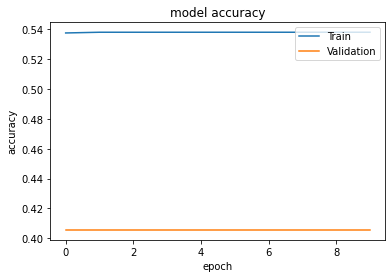

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()